In [1]:
%pylab inline
from scipy.linalg import cholesky
from octopus import density
from pygadgetreader import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
def homogeneous_sphere(n_dots):
    phi = random.rand(n_dots) * 2*pi
    theta = random.rand(n_dots) * 2 - 1
    R = random.rand(n_dots)
    X = R**(1/3.) * sin(phi) * sin(arccos(theta))
    Y = R**(1/3.) * cos(phi) * sin(arccos(theta))
    Z = R**(1/3.) * theta
    return X, Y, Z

(-1.5, 1.5, -1.5, 1.5)

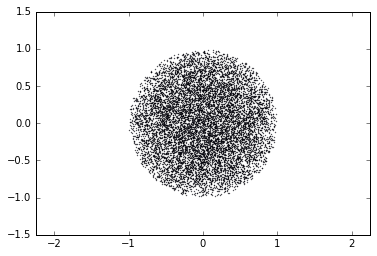

In [58]:
x, y, z = homogeneous_sphere(10000)

scatter(y, z, s=0.1)
axis('equal')

In [4]:
def A_matrix(a, b, c):
    A = np.zeros((3, 3))
    A[0][0] = 1.0/float(a)**2.
    A[1][1] = 1.0/float(b)**2.
    A[2][2] = 1.0/float(c)**2.
    return A

In [5]:
def B_matrix(A):
    B = cholesky(A, lower=True)
    return B, B.T
    

In [6]:
A_t = A_matrix(1.25, 1, 0.75)
b, b_t = B_matrix(A_t)

In [41]:
# Function to change the axis ratios as a function of r
def x_r(r, r0, q0, Sx):
    return -0.1 * np.log10(r/r0) + q0

In [7]:
def ellipse_gen(xyz, a, b, c):
    A = A_matrix(a, b, c)
    B, B_t = B_matrix(A)
    xyz_ellipse = np.zeros((len(xyz),3))
    for i in range(len(xyz)):
        xyz_ellipse[i] = np.dot(inv(B_t),xyz[i])
    return xyz_ellipse

In [74]:
def ellipsoid_var(xyz, q0, s0, x0, Sq, Ss):
    a=1.0
    r = np.sqrt(xyz[:,0]**2.0 + xyz[:,1]**2.0 + xyz[:,2]**2.0)
    r_bin = np.linspace(0,max(r),100)
    xyz_ellipse = np.zeros((len(xyz),3))
    N=np.zeros(len(r_bin))
    for i in range(1,len(r_bin)):
        index_bin = np.where((r<r_bin[i]) & (r>r_bin[i-1]))[0]
        xyz_bin = xyz[index_bin]
        N[i] = N[i-1]+len(xyz_bin)
        q = x_r(r_bin[i], x0, q0, Sq)
        s = x_r(r_bin[i], x0, s0, Ss)
        b = q*a
        c = s*a
        A = A_matrix(a, b, c)
        B, B_t = B_matrix(A)
        for j in range(int(N[i-1]), int(N[i])):
            xyz_ellipse[j] = np.dot(inv(B_t),xyz_bin[j-int(N[i-1])])
    return xyz_ellipse

In [75]:
xyz = np.zeros((10000, 3))
xyz[:,0] = x
xyz[:,1] = y
xyz[:,2] = z

In [9]:
xyz_ellipse = ellipse_gen(xyz, 1.25, 1, 1)

(-1.5, 1.5, -1.5, 1.5)

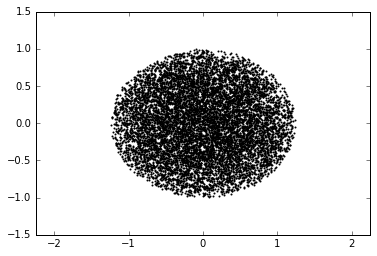

In [10]:
scatter(xyz_ellipse[:,0], xyz_ellipse[:,2], s=1)
axis('equal')

In [76]:
xyz_twist = ellipsoid_var(xyz, 0.8, 0.6, 10, -0.1, -0.18)

(-1.5, 1.5, -0.80000000000000004, 0.80000000000000004)

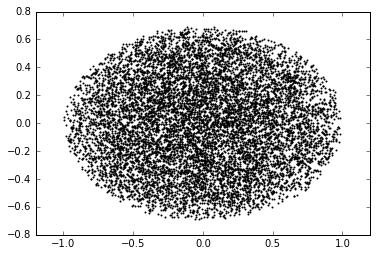

In [77]:
scatter(xyz_twist[:,0], xyz_twist[:,2], s=1)
axis('equal')

# Changing the axis ratios of a halo

In [78]:
real_halo = readsnap('../../LMC-MW/data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pos', 'dm')
real_halo_ids = readsnap('../../LMC-MW/data/LMCMW/MWmLMC6/H1/MWfLMC6H1_000.hdf5', 'pid', 'dm')

Returning DM    Positions
Returning DM    Particle IDs


In [13]:
id_cut = np.sort(real_halo_ids)[1000000]
index_mw = np.where(real_halo_ids<id_cut)[0]
print id_cut
x = real_halo[index_mw,0]
y = real_halo[index_mw,1]
z = real_halo[index_mw,2]
mw_coords = np.zeros((len(x),3))
mw_coords[:,0] = x
mw_coords[:,1] = y
mw_coords[:,2] = z

print len(x)

1600001
1000000


(-100000.0, 100000.0, -100000.0, 100000.0)

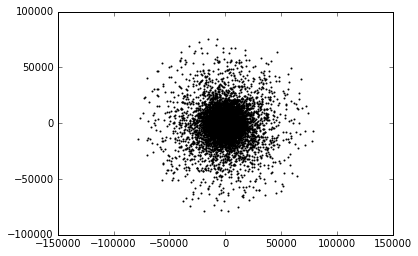

In [14]:
scatter(x, y, s=1)
axis('equal')

In [15]:
ellips_halo = ellipse_gen(mw_coords, 1.25, 1.0, 0.75)

(-150000.0, 150000.0, -100000.0, 100000.0)

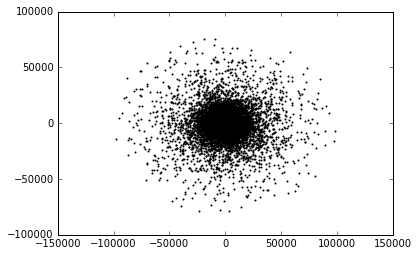

In [16]:
scatter(ellips_halo[:,0], ellips_halo[:,1], s=1)
axis('equal')

In [79]:
xyz_twist = ellipsoid_var(mw_coords, 0.8, 0.6, 10, -0.1, -0.18)

In [ ]:
rho = grid(ellips_halo[:,0], ellips_halo[:,1], ellips_halo[:,2], 100)

In [17]:
f = open('../../octopus/data/haloMW-ellipse.dat', 'w')
for i in range(len(ellips_halo)):
    f.write('%f %f %f \n'%(ellips_halo[i,0], ellips_halo[i,1], ellips_halo[i,2]))
f.close()

In [80]:
f = open('../../octopus/data/haloMW-twist.dat', 'w')
for i in range(len(ellips_halo)):
    f.write('%f %f %f \n'%(xyz_twist[i,0], xyz_twist[i,1], xyz_twist[i,2]))
f.close()

In [19]:
print len(ellips_halo)

1500000


In [ ]:
figure(figsize=(16, 6))
subplot(1, 2, 1)
imshow(log10(rho.T), origin='lower', 
       extent=[min(ellips_halo[:,0]), max(ellips_halo[:,0]), 
               min(ellips_halo[:,1]), max(ellips_halo[:,1])])

In [42]:
r = np.linspace(0, 300, 3000)
qr = x_r(r, 1, 0.8, 0.1)

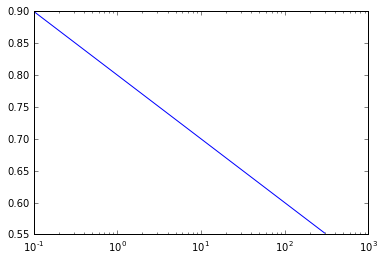

In [43]:
plot(r, qr)
xscale('log')
#ylim(0.6, 1)

## references:

 
    
- sec 2.5.5 of: http://onlinelibrary.wiley.com/book/10.1002/9780470230381;jsessionid=BA9E71D3879A6C94AAD91FC044CA74B1.f02t02

- https://www.quantstart.com/articles/Cholesky-Decomposition-in-Python-and-NumPy

- http://www.math.washington.edu/~king/coursedir/m308a01/Projects/m308a01-pdf/brown.pdf
